# Author- Nupur Rajeshirke
## Data Science & Business Analytics Internship - The Sparks Foundation
## Task-1:  Prediction Using Supervised Machine Learning
## The Aim of the task is to predict the percentage of an student based on the number of study hours using the Linear Progression Supervised Machine Learning Algorithm.

### Step1: Importing the dataset

In [4]:
# Importing the required libraries
import pandas as pd
import seaborn as sns
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [6]:
# Reading data 
path = "http://bit.ly/w-data"
data = pd.read_csv(path)
print("Data imported successfully")
data.head(15)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Step2: Check For the Null Values

In [7]:
#Checking if there are any null values in the dataset
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
#Use describe() method  to see percentiles,mean,std deviation,max,min,count of the given dataset.
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
#Print the full summary of the data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


### Step3: Visualize The Data

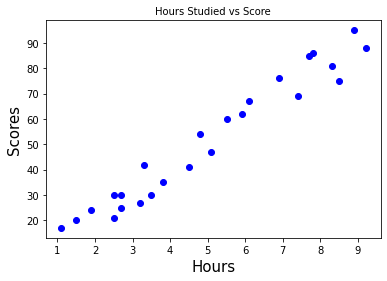

In [20]:
#Ploting Scatter plot

plt.xlabel('Hours', fontsize = 15)
plt.ylabel('Scores', fontsize = 15)
plt.title('Hours Studied vs Score', fontsize = 10)
plt.scatter(data.Hours,data.Scores, color='blue', marker='o')
plt.show()

#### This Scatter Plot indicates positive linear relationship as much as hours you study is a chance of high scoring.

### Step4: Prepare the Data

In [14]:
# Divide the data into "attributes" (inputs) and "labels" (outputs)
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

### Step5: Split The Data into Train and Test Sets

In [15]:
# Now that we have our attributes and labels, the next step is to split this data into training and test sets. 
# We'll do this by using Scikit-Learn's built-in train_test_split() method:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Step6: Train The Model

In [17]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
print("Training Of Model is Complete")

Training Of Model is Complete


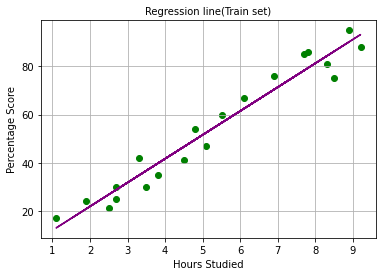

In [21]:
# Plotting the regression line
line = reg.coef_*X + reg.intercept_
plt.scatter(X_train, y_train,color='green')
plt.plot(X, line, color = 'purple')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.title("Regression line(Train set)",fontsize=10)
plt.grid()
plt.show()

### Step7: Test the Data

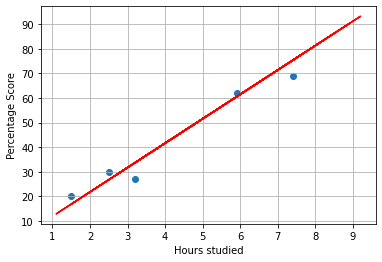

In [23]:
#plotting line on test data
plt.scatter(X_test, y_test)
plt.plot(X, line, color = 'red')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

### Step8: Make Prediction

In [24]:
print(X_test) # Testing data - In Hours
y_pred = reg.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Comparing Actual vs Predicted Scores

In [25]:
compare_scores = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
compare_scores

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Accuracy Of The Model

In [28]:
# goodness of the fit test
from sklearn import metrics
print('Accuracy of Actual and Predicted R-squared IS:', metrics.r2_score(y_test, y_pred))

Accuracy of Actual and Predicted R-squared IS: 0.9454906892105355


#### Above 94% percentage indicates that above fitted Model is a GOOD MODEL.

### Step9: Predicting the Error

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
MAb_E = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",RMSE)
print("Mean Absolute Error     = ",MAb_E)

Mean Squared Error      =  21.598769307217413
Root Mean Squared Error =  4.647447612100368
Mean Absolute Error     =  4.647447612100368


#### Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less

### Step10: What will be predicted score if a student studies for 9.25 hrs/ day?

In [35]:
# You can also test with your own data
hours = [9.25]
result = reg.predict([hours])
print("Predicted Score for 9.25 hours/day = {}".format(round(result[0],2)))

Predicted Score for 9.25 hours/day = 93.69


## Conclusion::

### From the above result we can say that if a studied for 9.25 hrs/day then student will secure 93.69 MARKS.